<a href="https://colab.research.google.com/github/adityadhumal06/CNN_Cat_Dog_Classifier/blob/main/Covid_19_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

100% 158M/158M [00:08<00:00, 23.9MB/s]
100% 158M/158M [00:08<00:00, 19.8MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-image-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [34]:
# Import Libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
# generators

training_data = tf.keras.utils.image_dataset_from_directory(
    directory='/content/Covid19-dataset/train',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_data = tf.keras.utils.image_dataset_from_directory(
    directory='/content/Covid19-dataset/test',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [12]:
# Normalize the data

def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = training_data.map(process)
validation_ds = validation_data.map(process)

In [49]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [50]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 30, 30, 128)     

In [51]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
8/8 [==============================] - 7s 203ms/step - loss: 2.4852 - accuracy: 0.4024 - val_loss: 0.9862 - val_accuracy: 0.4545
Epoch 2/10
8/8 [==============================] - 4s 159ms/step - loss: 0.6719 - accuracy: 0.7968 - val_loss: 0.9971 - val_accuracy: 0.6364
Epoch 3/10
8/8 [==============================] - 4s 161ms/step - loss: 0.3318 - accuracy: 0.8924 - val_loss: 0.4803 - val_accuracy: 0.7576
Epoch 4/10
8/8 [==============================] - 5s 136ms/step - loss: 0.2640 - accuracy: 0.8805 - val_loss: 0.3676 - val_accuracy: 0.8485
Epoch 5/10
8/8 [==============================] - 5s 200ms/step - loss: 0.1225 - accuracy: 0.9641 - val_loss: 0.6016 - val_accuracy: 0.7879
Epoch 6/10
8/8 [==============================] - 4s 134ms/step - loss: 0.0681 - accuracy: 0.9801 - val_loss: 0.2837 - val_accuracy: 0.8485
Epoch 7/10
8/8 [==============================] - 4s 160ms/step - loss: 0.0567 - accuracy: 0.9801 - val_loss: 0.5006 - val_accuracy: 0.8788
Epoch 8/10
8/8 [====

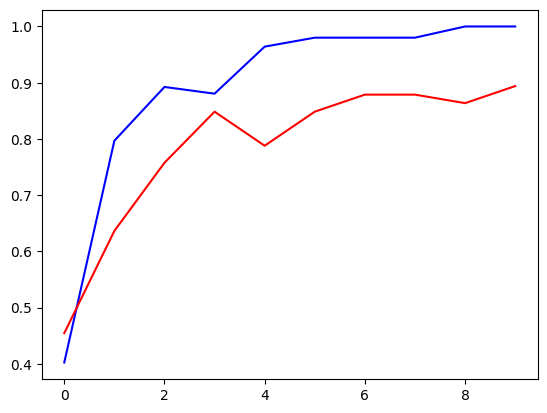

In [53]:
tr_acc = history.history['accuracy']
ts_acc = history.history['val_accuracy']

import matplotlib.pyplot as plt

plt.plot(tr_acc,color='blue')
plt.plot(ts_acc,color='red')

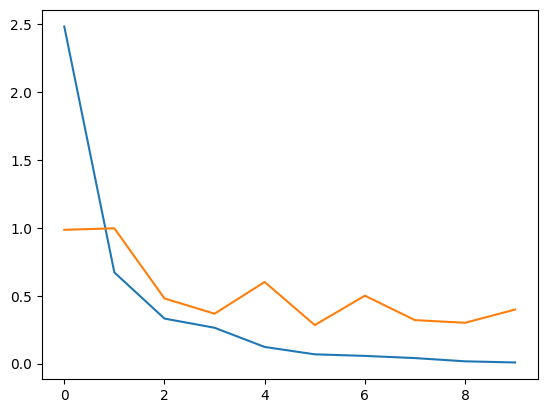

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [55]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regulizer
# Dropout
# Batch Normalization
# Reduce Complexity

In [56]:
import cv2

In [57]:
test_img = cv2.imread('/content/0102.jpeg')

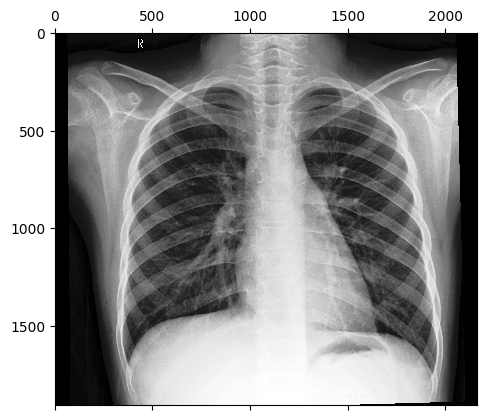

In [58]:
plt.matshow(test_img)

In [59]:
test_img.shape

(1907, 2165, 3)

In [62]:
import numpy as np

test_img = cv2.resize(test_img,(256,256))

In [63]:
test_input = test_img.reshape(1,256,256,3)

In [64]:
model.predict(test_input)

1/1 [==============================] - 0s 318ms/step


array([[0., 1., 0.]], dtype=float32)

In [65]:
viral = cv2.imread('/content/Screenshot 2023-08-25 184322.jpg')

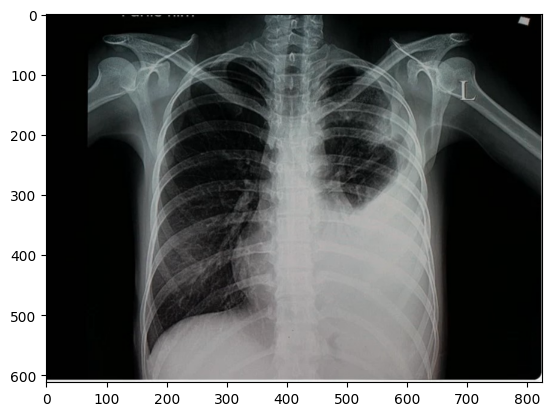

In [66]:
plt.imshow(viral)

In [67]:
viral.shape

(612, 825, 3)

In [68]:
test_img_viral = cv2.resize(viral,(256,256))


In [69]:
test_viral = test_img_viral.reshape(1,256,256,3)

In [70]:
model.predict(test_viral)

1/1 [==============================] - 0s 23ms/step


array([[0., 0., 1.]], dtype=float32)